In [25]:
import pandas as pd
import numpy as np
 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Estimaciones (Provincia de BsAs 1987-2022v2).csv', encoding='latin-1',sep=';')

In [27]:
df

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
0,Ajo,1987/88,BUENOS AIRES,ARRECIFES,6,77,10,10,35,3500
1,Ajo,1987/88,BUENOS AIRES,BAHIA BLANCA,6,56,10,10,30,3000
2,Ajo,1987/88,BUENOS AIRES,BALCARCE,6,63,258,258,910,3527
3,Ajo,1989/90,BUENOS AIRES,BALCARCE,6,63,50,50,250,5000
4,Ajo,1990/91,BUENOS AIRES,BALCARCE,6,63,80,80,400,5000
...,...,...,...,...,...,...,...,...,...,...
29214,Trigo total,2017/18,BUENOS AIRES,ZARATE,6,882,1950,1950,8385,4300
29215,Trigo total,2018/19,BUENOS AIRES,ZARATE,6,882,2800,2800,12320,4400
29216,Trigo total,2019/20,BUENOS AIRES,ZARATE,6,882,2500,2500,10000,4000
29217,Trigo total,2020/21,BUENOS AIRES,ZARATE,6,882,3000,3000,11700,3900


In [28]:
df.describe()

,idProvincia,idDepartamento,Sup. Sembrada
count,29219.0,29219.000000,29219.000000
mean,6.0,439.576166,16122.353058
std,0.0,259.303609,29713.154287
min,6.0,0.000000,1.000000
25%,6.0,203.000000,850.000000
50%,6.0,448.000000,4000.000000
75%,6.0,679.000000,17500.000000
max,6.0,882.000000,880000.000000


In [29]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29219 entries, 0 to 29218
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cultivo         29219 non-null  object
 1   Campaña         29219 non-null  object
 2   Provincia       29219 non-null  object
 3   Departamento    29219 non-null  object
 4   idProvincia     29219 non-null  int64 
 5   idDepartamento  29219 non-null  int64 
 6   Sup. Sembrada   29219 non-null  int64 
 7   Sup. Cosechada  29219 non-null  object
 8   Producción      29219 non-null  object
 9   Rendimiento     29219 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.2+ MB


In [43]:
df['Rendimiento'].replace('SD', '0', inplace=True)

In [44]:

df.Rendimiento = df.Rendimiento.astype(float)

In [45]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29219 entries, 0 to 29218
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cultivo         29219 non-null  object 
 1   Campaña         29219 non-null  object 
 2   Provincia       29219 non-null  object 
 3   Departamento    29219 non-null  object 
 4   idProvincia     29219 non-null  int64  
 5   idDepartamento  29219 non-null  int64  
 6   Sup. Sembrada   29219 non-null  int64  
 7   Sup. Cosechada  29219 non-null  object 
 8   Producción      29219 non-null  object 
 9   Rendimiento     29219 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.2+ MB


In [46]:
df['Producción'].replace('SD', '0', inplace=True)

In [47]:
df.Producción = df.Producción.astype(float)

In [52]:
df['Sup. Cosechada'].replace('SD', '0', inplace=True)

In [55]:
df.columns

Index(['Cultivo', 'Campaña', 'Provincia', 'Departamento', 'idProvincia',
       'idDepartamento', 'Sup. Sembrada', 'Sup. Cosechada', 'Producción',
       'Rendimiento'],
      dtype='object')

In [59]:
df.rename(columns={"Sup. Sembrada":"Sup_Sembrada","Sup. Cosechada":"Sup_Cosechada"}, inplace=True)



In [63]:
df.Sup_Cosechada = df.Sup_Cosechada.astype(float)

In [64]:
df.dtypes

Cultivo            object
Campaña            object
Provincia          object
Departamento       object
idProvincia         int64
idDepartamento      int64
Sup_Sembrada      float64
Sup_Cosechada     float64
Producción        float64
Rendimiento       float64
dtype: object

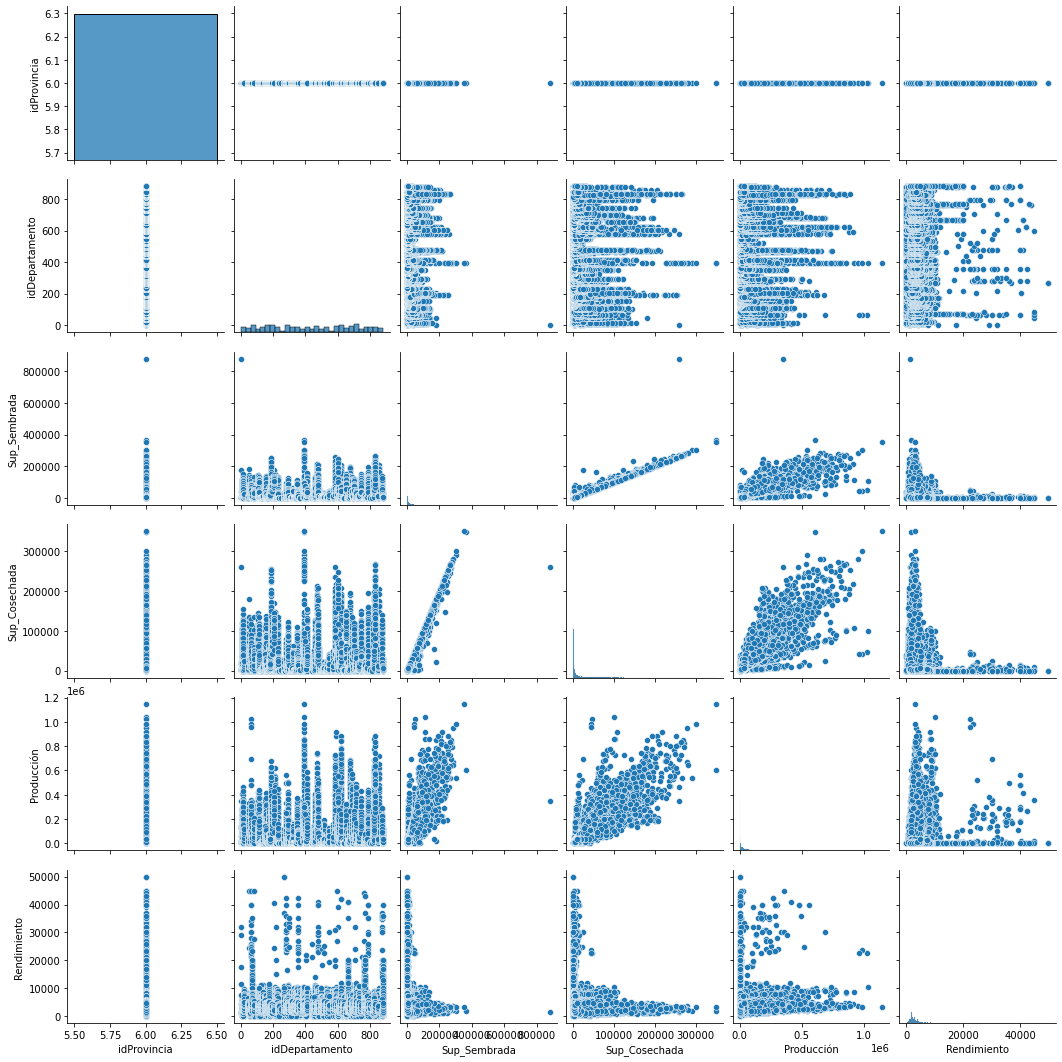

In [65]:
sns.pairplot(df)

In [66]:
df.corr()

,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
idProvincia,NaN,NaN,NaN,NaN,NaN,NaN
idDepartamento,NaN,1.000000,0.010793,0.010970,0.013179,0.027735
Sup_Sembrada,NaN,0.010793,1.000000,0.983686,0.869820,-0.013060
Sup_Cosechada,NaN,0.010970,0.983686,1.000000,0.883881,-0.010333
Producción,NaN,0.013179,0.869820,0.883881,1.000000,0.190188
Rendimiento,NaN,0.027735,-0.013060,-0.010333,0.190188,1.000000


<AxesSubplot:>

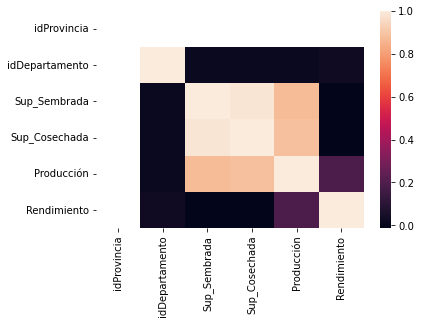

In [67]:
sns.heatmap(df.corr())

<AxesSubplot:>

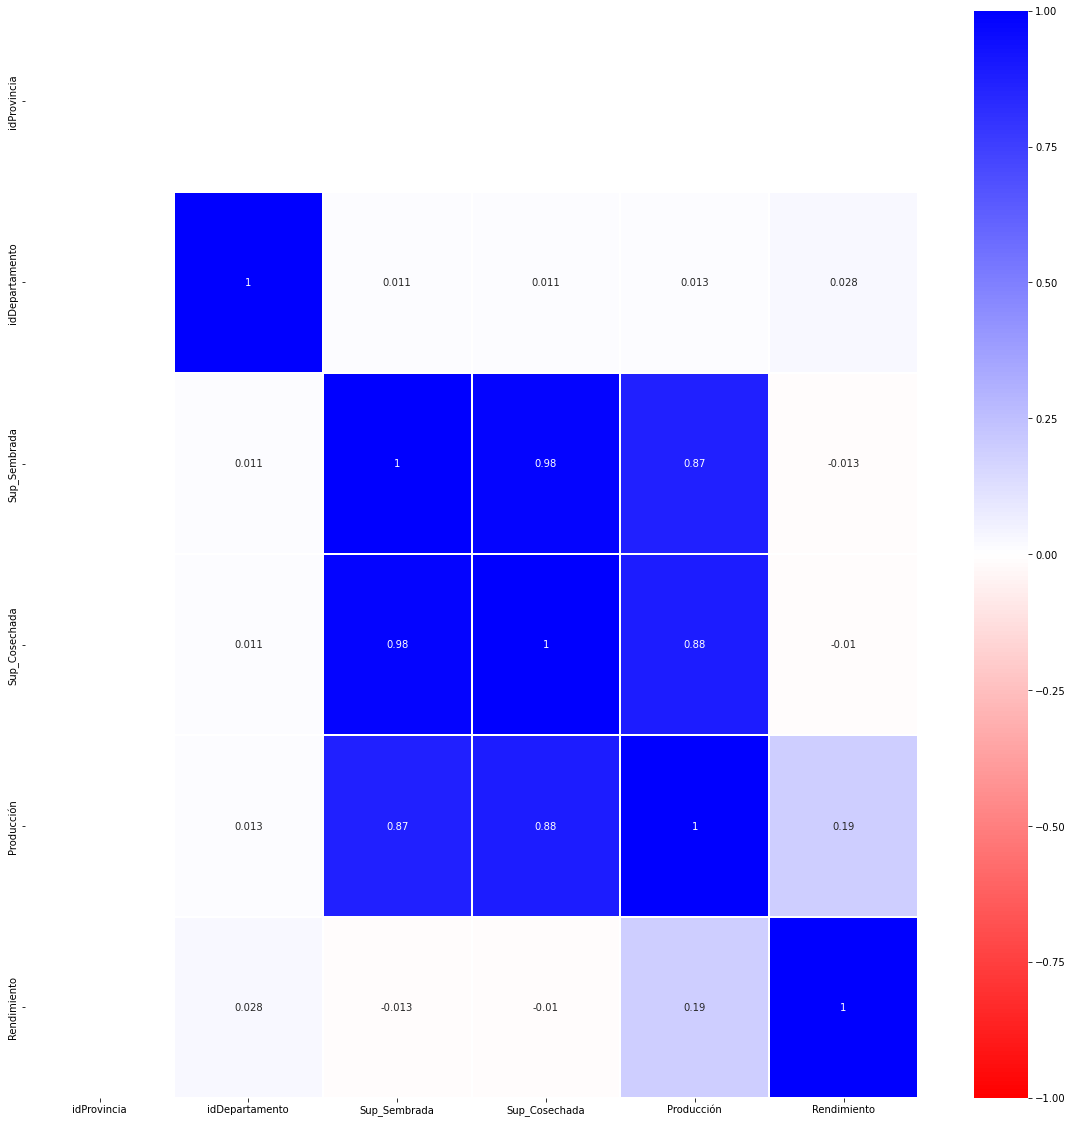

In [68]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="bwr_r",linewidths=.4)


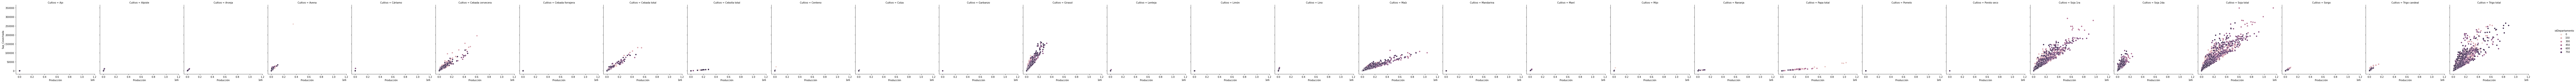

In [77]:
sns.relplot(data=df, x='Producción', y='Sup_Cosechada',hue='idDepartamento',kind='scatter', col='Cultivo')

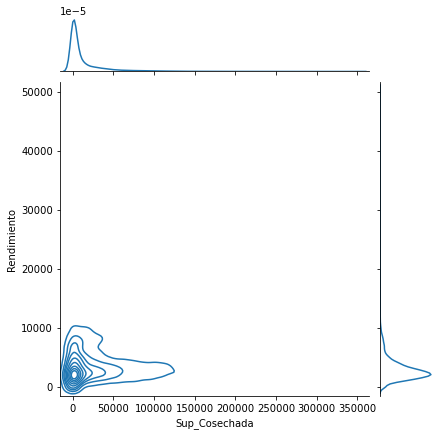

In [82]:
sns.jointplot(data=df,x='Sup_Cosechada', y='Rendimiento',kind="kde")

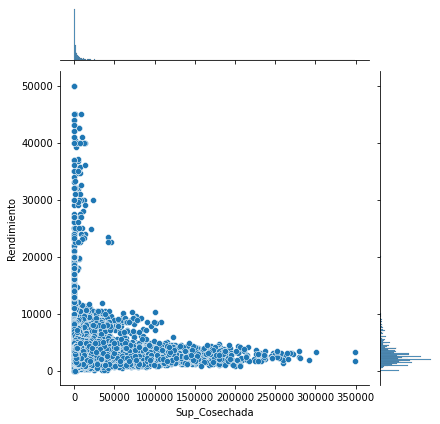

In [74]:
sns.jointplot(data=df,x='Sup_Cosechada', y='Rendimiento')

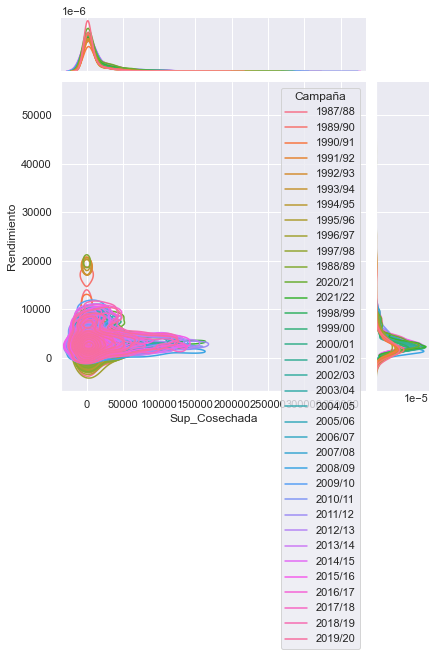

In [94]:
sns.jointplot(data=df,x='Sup_Cosechada', y='Rendimiento',kind="kde", hue='Campaña')
sns.set(rc = {'figure.figsize':(10,5)})
